In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd 
pd.options.display.max_columns = 100

import numpy as np 


from PIL import Image
from scipy import ndimage

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)


sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

import cv2
import glob
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta, Adamax
from keras.utils import to_categorical
from matplotlib import pyplot




Using TensorFlow backend.


In [4]:
images1 = []
targets1 = []



path1 = "D:/ML_input_data/endoscope/kvasir-dataset-v2/dyed-lifted-polyps"
path2 = "D:/ML_input_data/endoscope/kvasir-dataset-v2/dyed-resection-margins"
path3 = "D:/ML_input_data/endoscope/kvasir-dataset-v2/esophagitis"
path4 = "D:/ML_input_data/endoscope/kvasir-dataset-v2/normal-cecum"
path5 = "D:/ML_input_data/endoscope/kvasir-dataset-v2/normal-pylorus"
path6 = "D:/ML_input_data/endoscope/kvasir-dataset-v2/normal-z-line"
path7 = "D:/ML_input_data/endoscope/kvasir-dataset-v2/polyps"
path8 = "D:/ML_input_data/endoscope/kvasir-dataset-v2/ulcerative-colitis"



for i in glob.glob(os.path.join(path1,'*jpg')):
    img = cv2.imread(i)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(0)
    
for j in glob.glob(os.path.join(path2,'*jpg')):
    img = cv2.imread(j)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(1)    
    
    
for k in glob.glob(os.path.join(path3,'*jpg')):
    img = cv2.imread(k)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(2)
    
for l in glob.glob(os.path.join(path4,'*jpg')):
    img = cv2.imread(l)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(3)    
    
    
for m in glob.glob(os.path.join(path5,'*jpg')):
    img = cv2.imread(m)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(4)
    
for n in glob.glob(os.path.join(path6,'*jpg')):
    img = cv2.imread(n)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(5)    
    
for o in glob.glob(os.path.join(path7,'*jpg')):
    img = cv2.imread(o)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(6)
    
for p in glob.glob(os.path.join(path8,'*jpg')):
    img = cv2.imread(p)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images1.append(np.array(img))
    targets1.append(7)       
    
    




In [5]:
endoscope_images1 , endoscope_labels1 = np.array(images1), np.array(targets1)    


In [17]:
np.unique(endoscope_labels1)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [6]:

np.save("endoscope_images1",endoscope_images1)
np.save("endoscope_labels1",endoscope_labels1)

In [7]:
the_endoscope_images1, the_endoscope_labels1 = np.load("endoscope_images1.npy") , np.load("endoscope_labels1.npy")

print(the_endoscope_images1, the_endoscope_labels1)

[[[[ 4  4  4]
   [ 4  4  4]
   [ 2  4  4]
   ...
   [ 3  3  3]
   [ 4  4  4]
   [ 4  4  4]]

  [[ 2  4  4]
   [ 0  3  1]
   [ 4  3  2]
   ...
   [ 0  2  2]
   [ 1  3  3]
   [ 1  3  3]]

  [[ 2  2  2]
   [ 2  2  2]
   [ 2  2  2]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 0  2  2]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [57 64 33]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 0  2  0]]]


 [[[ 4  4  4]
   [ 5  5  5]
   [ 4  4  4]
   ...
   [ 4  4  4]
   [ 4  4  4]
   [ 3  3  3]]

  [[ 3  4  2]
   [ 1  3  3]
   [ 3  4  3]
   ...
   [ 2  3  3]
   [ 0  1  1]
   [ 0  2  2]]

  [[ 3  2  2]
   [ 2  2  2]
   [ 2  2  2]
   ...
   [ 2  2  2]
   [ 2  2  2]
   [ 1  1  1]]

  ...

  [[ 1  1  1]
   [ 1  1  1]
   [62 69 36]
   ...
   [ 0  0  0]
   [ 1  1  1]
   [ 0  0  0]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 

In [4]:
the_endoscope_images1

array([[[[ 4,  4,  4],
         [ 4,  4,  4],
         [ 2,  4,  4],
         ...,
         [ 3,  3,  3],
         [ 4,  4,  4],
         [ 4,  4,  4]],

        [[ 2,  4,  4],
         [ 0,  3,  1],
         [ 4,  3,  2],
         ...,
         [ 0,  2,  2],
         [ 1,  3,  3],
         [ 1,  3,  3]],

        [[ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 0,  2,  2]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [57, 64, 33],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 0,  2,  0]]],


       [[[ 4,  4,  4],
         [ 5,  5,  5],
         [ 4, 

In [3]:
the_endoscope_labels1

array([0, 0, 0, ..., 7, 7, 7])

8000


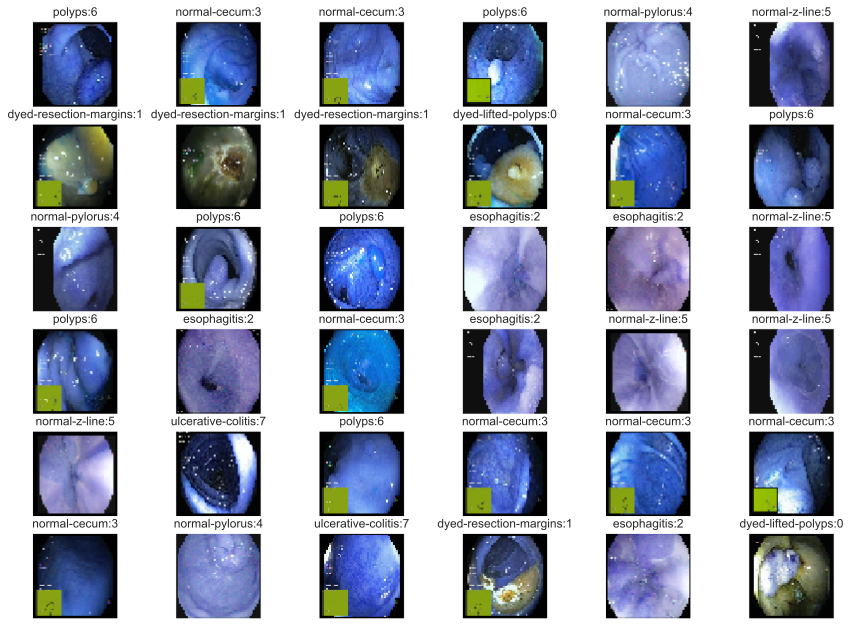

In [8]:
fig=plt.figure(figsize=(15, 11))
n = 36
print(the_endoscope_images1.shape[0])
for i in range(n):
    img = np.random.randint(0, the_endoscope_images1.shape[0] , 1)
    fig.add_subplot(n**(.5), n**(.5), i+1)
    plt.imshow(the_endoscope_images1[img[0]])

    plt.title('{}:{}' .format('dyed-lifted-polyps' if the_endoscope_labels1[img[0]]==0 else 'dyed-resection-margins' if the_endoscope_labels1[img[0]]==1 else 'esophagitis' if the_endoscope_labels1[img[0]]==2 else 'normal-cecum' if the_endoscope_labels1[img[0]]==3 else 'normal-pylorus' if the_endoscope_labels1[img[0]]==4 else 'normal-z-line' if the_endoscope_labels1[img[0]]==5 else 'polyps' if the_endoscope_labels1[img[0]]==6  else 'ulcerative-colitis' ,the_endoscope_labels1[img[0]]) )

    plt.xticks([]) , plt.yticks([])
        
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(the_endoscope_images1, the_endoscope_labels1, test_size=0.2)
    
    #converting to float and normalizing
X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/255
    
    #getting the numbr of unique classes in the labels
#num_classes=len(np.unique(the_endoscope_labels1))

num_classes = 8
    
    
#     #One hot encoding as classifier since we  has multiple classes
Y_train=keras.utils.to_categorical(Y_train,num_classes)
Y_test=keras.utils.to_categorical(Y_test,num_classes )


# Neural Network Models

### Fully connected neural network

In [10]:
from keras.layers import Dense, Activation


nnmodel = Sequential()
nnmodel.add(Dense(32, input_shape=(50,50,3)))
nnmodel.add(Activation('relu'))
nnmodel.add(Flatten())
nnmodel.add(Dense(8,activation="softmax")) 
nnmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50, 50, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 640008    
Total params: 640,136
Trainable params: 640,136
Non-trainable params: 0
_________________________________________________________________


In [55]:
nnmodel.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['mae', 'acc'])

nnhistory =nnmodel.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, verbose=1)


Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 8s 1ms/step - loss: 0.1920 - mae: 0.0314 - acc: 0.9458 - val_loss: 0.7941 - val_mae: 0.0788 - val_acc: 0.7225
Epoch 2/100
6400/6400 [==============================] - 7s 1ms/step - loss: 0.1970 - mae: 0.0318 - acc: 0.9436 - val_loss: 0.7539 - val_mae: 0.0772 - val_acc: 0.7219
Epoch 3/100
6400/6400 [==============================] - 7s 1ms/step - loss: 0.1856 - mae: 0.0315 - acc: 0.9467 - val_loss: 0.8754 - val_mae: 0.0825 - val_acc: 0.6956
Epoch 4/100
6400/6400 [==============================] - 7s 1ms/step - loss: 0.1660 - mae: 0.0295 - acc: 0.9544 - val_loss: 1.2754 - val_mae: 0.0851 - val_acc: 0.6844
Epoch 5/100
6400/6400 [==============================] - 7s 1ms/step - loss: 0.1833 - mae: 0.0299 - acc: 0.9486 - val_loss: 0.8637 - val_mae: 0.0815 - val_acc: 0.7031
Epoch 6/100
6400/6400 [==============================] - 7s 1ms/step - loss: 0.1597 - mae: 0.0284 - acc: 0.9564 - val

Epoch 98/100
6400/6400 [==============================] - 8s 1ms/step - loss: 0.0466 - mae: 0.0083 - acc: 0.9941 - val_loss: 1.1461 - val_mae: 0.0772 - val_acc: 0.7038
Epoch 99/100
6400/6400 [==============================] - 7s 1ms/step - loss: 0.0372 - mae: 0.0079 - acc: 0.9950 - val_loss: 1.0443 - val_mae: 0.0742 - val_acc: 0.7150
Epoch 100/100
6400/6400 [==============================] - 7s 1ms/step - loss: 0.0752 - mae: 0.0100 - acc: 0.9858 - val_loss: 1.0417 - val_mae: 0.0735 - val_acc: 0.7250


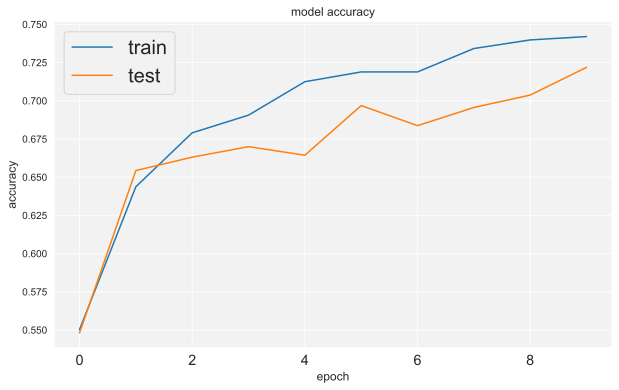

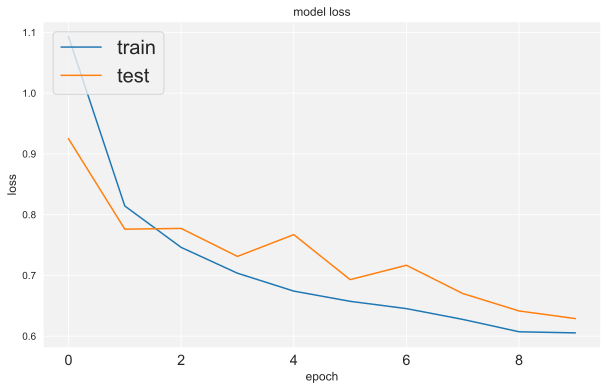

In [23]:
plt.figure(figsize=(10, 6))  

# summarize history for accuracy
plt.plot(nnhistory.history['acc'])
plt.plot(nnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test' ], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10,6))
plt.plot(nnhistory.history['loss'])
plt.plot(nnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

In [7]:
from keras.layers import Dense, Activation
# import regularizer
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)

In [25]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(50,activation="relu"))
model.add(Dense(8,activation="softmax",activity_regularizer=l1(0.001)))#2 represent output layer neurons 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                230450    
_________________________________________________________________
dense_4 (Dense)              (None, 8)                

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['mae', 'acc'])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300, verbose=1)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 11s 2ms/step - loss: 1.7413 - mae: 0.2001 - acc: 0.3861 - val_loss: 1.2103 - val_mae: 0.1623 - val_acc: 0.5225
Epoch 2/10
6400/6400 [==============================] - 11s 2ms/step - loss: 1.0114 - mae: 0.1415 - acc: 0.5773 - val_loss: 0.9521 - val_mae: 0.1308 - val_acc: 0.5663
Epoch 3/10
6400/6400 [==============================] - 10s 2ms/step - loss: 0.8611 - mae: 0.1223 - acc: 0.6355 - val_loss: 0.8213 - val_mae: 0.1182 - val_acc: 0.6369
Epoch 4/10
6400/6400 [==============================] - 10s 2ms/step - loss: 0.8183 - mae: 0.1166 - acc: 0.6467 - val_loss: 0.8209 - val_mae: 0.1113 - val_acc: 0.6338
Epoch 5/10
6400/6400 [==============================] - 10s 2ms/step - loss: 0.7760 - mae: 0.1109 - acc: 0.6673 - val_loss: 0.7608 - val_mae: 0.1073 - val_acc: 0.6737
Epoch 6/10
6400/6400 [==============================] - 10s 2ms/step - loss: 0.7512 - mae: 0.1078 - acc: 0.6761 - val

# Plotting the Loss and Accuracy

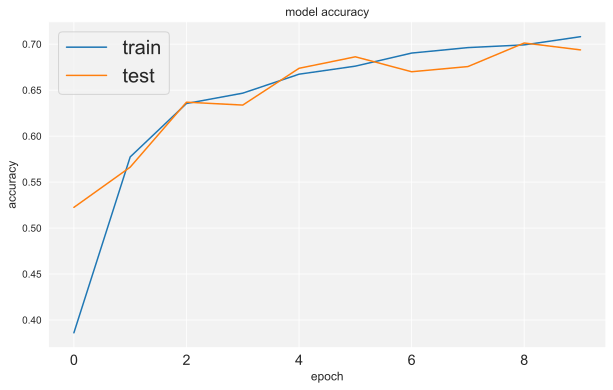

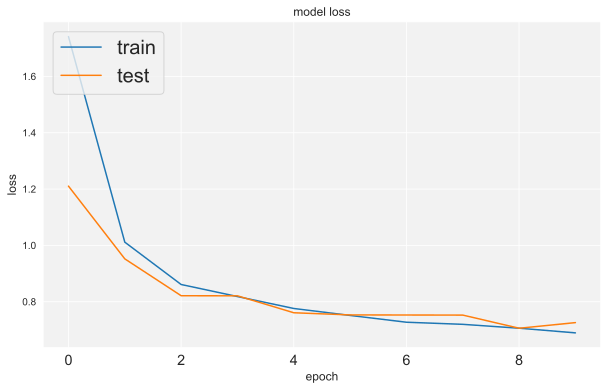

In [27]:
# summarize history for accuracy
plt.figure(figsize=(10, 6))  

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10, 6))  
plt.savefig('summarize history for accuracy.png')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

## Confusion matrix and classification report

In [29]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1) 
y_true = Y_test
y_true=np.argmax(y_true, axis=1) 


print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.59      0.43      0.50       189
           1       0.60      0.72      0.66       188
           2       0.78      0.67      0.72       219
           3       0.74      0.93      0.82       201
           4       0.92      0.81      0.86       208
           5       0.57      0.75      0.65       190
           6       0.60      0.75      0.67       207
           7       0.89      0.47      0.62       198

    accuracy                           0.69      1600
   macro avg       0.71      0.69      0.69      1600
weighted avg       0.71      0.69      0.69      1600



In [30]:
#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 81,  90,   0,   0,   0,   0,  18,   0],
       [ 48, 136,   0,   0,   0,   0,   4,   0],
       [  0,   0, 147,   0,   2,  70,   0,   0],
       [  0,   0,   0, 186,   0,   0,  14,   1],
       [  1,   0,   1,   0, 169,  34,   3,   0],
       [  1,   0,  41,   0,   5, 142,   0,   1],
       [  3,   0,   0,  31,   7,   1, 155,  10],
       [  4,   1,   0,  33,   0,   1,  65,  94]], dtype=int64)

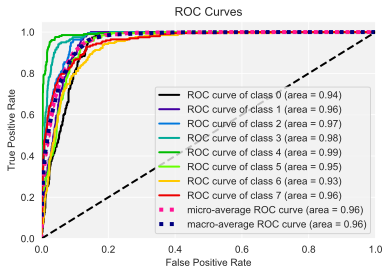

<Figure size 3600x360 with 0 Axes>

In [31]:
import scikitplot 
%matplotlib inline

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
y_probas = model.predict(X_test)
scikitplot.metrics.plot_roc(y_true, y_probas)
plt.figure(figsize=(50, 5)) 
#plt.legend(fontsize = 'xx-small')
plt.show()

In [45]:
plt.savefig('KvasirCnnROCcurve.png')

<Figure size 432x288 with 0 Axes>

In [38]:
images_for_test = []
images_names = []
data_path = "C:\\Users\\kratika\\KratikaML\\QX_DataScience_Kratika\\20-projects_List\\endoscopy\\test-data";
for i in glob.glob(os.path.join(data_path,'*')):
    img = cv2.imread(i)
    #img  = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY) # convert to grayscale
    img = cv2.resize(img,(50,50))  #resize
    images_for_test.append(np.array(img))
    images_names.append(i.replace(data_path, ""))
    
images_for_test = np.array(images_for_test)
predicted_values_nnmodel = nnmodel.predict(images_for_test)
predicted_values_model = model.predict(images_for_test)

print("NN Model Predicted Values : ")
print(images_names)
print( predicted_values_nnmodel)

print("CNN Model Predicted Values : ")
print(images_names)
print(predicted_values_model)

NN Model Predicted Values : 
['\\0053d7cd-549c-48cd-b370-b4ad64a8098a.jpg', '\\0d4c9fce-f423-40bc-84ca-53f0fb570696.jpg', '\\1ae4a354-2392-4c30-a9fc-808d91c795e1.jpg', '\\asfd.jpg', '\\image5.jpeg', '\\UC_granularity.png']
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]
CNN Model Predicted Values : 
['\\0053d7cd-549c-48cd-b370-b4ad64a8098a.jpg', '\\0d4c9fce-f423-40bc-84ca-53f0fb570696.jpg', '\\1ae4a354-2392-4c30-a9fc-808d91c795e1.jpg', '\\asfd.jpg', '\\image5.jpeg', '\\UC_granularity.png']
[[7.8876074e-14 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000

# Variations of the models for Hyperparameter Optimization

view how the models loss and accuracy and loss changes
1. fcn2layer, lr = 0.01, beta = 0,reg=0, epochs = 10
2. fcn2layer+reg, lr = 0.01, beta = 0,reg=0.001, epochs = 10
3. fcn2layer+lr1, lr = 0.001, beta = 0,reg=0, epochs = 10
4. fcn2layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10
5. fcn3layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10
6. fcn3layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10
7. fcn4layer+lr1+reg, lr = 0.001, beta = 0,reg=0.001, epochs = 10

and also when the nodes changes
1. fcn2layer, nodes = 32
2. fcn2layer, nodes = 64
3. fcn2layer, nodes = 128


In [39]:
model.save_weights("model.h5")
print("Saved model to disk")

nnmodel.save_weights("nnmodel.h5")
print("Saved nnmodel to disk")


Saved model to disk
Saved nnmodel to disk


In [42]:
# load weights into new model
loaded_model = Sequential()
loaded_model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
loaded_model.add(MaxPooling2D(pool_size=2))
loaded_model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
loaded_model.add(MaxPooling2D(pool_size=2))
loaded_model.add(Flatten())
loaded_model.add(Dense(50,activation="relu"))
loaded_model.add(Dense(8,activation="softmax",activity_regularizer=l1(0.001)))#2 represent output layer neurons 
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_nnmodel = Sequential()
loaded_nnmodel.add(Dense(32, input_shape=(50,50,3)))
loaded_nnmodel.add(Activation('relu'))
loaded_nnmodel.add(Flatten())
loaded_nnmodel.add(Dense(8,activation="softmax")) 
loaded_nnmodel.load_weights("nnmodel.h5")
print("Loaded model from disk")



Loaded model from disk
Loaded model from disk


In [45]:

predicted_values_nnmodel = loaded_model.predict(images_for_test)
predicted_values_model = loaded_nnmodel.predict(images_for_test)

print("NN Model Predicted Values : ")
print(images_names)
print( predicted_values_nnmodel)

print("CNN Model Predicted Values : ")
print(images_names)
print(predicted_values_model)

NN Model Predicted Values : 
['\\0053d7cd-549c-48cd-b370-b4ad64a8098a.jpg', '\\0d4c9fce-f423-40bc-84ca-53f0fb570696.jpg', '\\1ae4a354-2392-4c30-a9fc-808d91c795e1.jpg', '\\asfd.jpg', '\\image5.jpeg', '\\UC_granularity.png']
[[7.8876074e-14 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
CNN Model Predicted Values : 
['\\0053d7cd-549c-48cd-b370-b4ad64a8098a.jpg

In [11]:
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [12]:
cnnmodel_rmsprop = Sequential()
cnnmodel_rmsprop.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
cnnmodel_rmsprop.add(MaxPooling2D(pool_size=2))
cnnmodel_rmsprop.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
cnnmodel_rmsprop.add(MaxPooling2D(pool_size=2))
cnnmodel_rmsprop.add(Flatten())
cnnmodel_rmsprop.add(Dense(50,activation="relu"))
cnnmodel_rmsprop.add(Dense(8,activation="softmax"))#2 represent output layer neurons 
#cnnmodel_rmsprop.summary()
cnnmodel_rmsprop.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist_rmsprop = cnnmodel_rmsprop.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, verbose=1, callbacks=[reduce_lr])

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 12s 2ms/step - loss: 0.2040 - accuracy: 0.9018 - val_loss: 0.1673 - val_accuracy: 0.9180
Epoch 2/30
6400/6400 [==============================] - 11s 2ms/step - loss: 0.1564 - accuracy: 0.9254 - val_loss: 0.1535 - val_accuracy: 0.9226
Epoch 3/30
6400/6400 [==============================] - 11s 2ms/step - loss: 0.1449 - accuracy: 0.9314 - val_loss: 0.1573 - val_accuracy: 0.9221
Epoch 4/30
6400/6400 [==============================] - 11s 2ms/step - loss: 0.1344 - accuracy: 0.9378 - val_loss: 0.1431 - val_accuracy: 0.9302
Epoch 5/30
6400/6400 [==============================] - 11s 2ms/step - loss: 0.1286 - accuracy: 0.9402 - val_loss: 0.1539 - val_accuracy: 0.9275
Epoch 6/30
6400/6400 [==============================] - 11s 2ms/step - loss: 0.1225 - accuracy: 0.9439 - val_loss: 0.1345 - val_accuracy: 0.9373
Epoch 7/30
6400/6400 [==============================] - 11s 2ms/step - loss: 0.117

In [13]:
cnnmodel_rmsprop.save_weights("cnnmodel_rmsprop.h5")
print("Saved model to disk")


Saved model to disk


In [13]:
probs = cnnmodel_rmsprop.predict_proba(X_test)
probs

array([[2.6786856e-07, 8.1582008e-10, 4.3676991e-08, ..., 3.9324630e-07,
        2.1368866e-03, 3.1193547e-05],
       [1.4576283e-01, 1.5173590e-02, 4.0325496e-10, ..., 3.5663364e-10,
        6.4552814e-01, 5.1804734e-03],
       [1.7465985e-09, 2.0785369e-09, 1.5326024e-09, ..., 4.8062890e-12,
        6.4408046e-04, 9.9935585e-01],
       ...,
       [8.1651124e-06, 1.2708711e-05, 2.6177687e-13, ..., 3.9726778e-13,
        2.2424237e-01, 1.4183365e-02],
       [1.5636355e-10, 4.6632787e-09, 9.8872387e-01, ..., 1.1276148e-02,
        1.7036617e-09, 7.9602824e-10],
       [4.0804363e-05, 6.8367199e-06, 2.3413917e-02, ..., 9.8999754e-02,
        1.0368862e-01, 4.9459942e-02]], dtype=float32)

In [14]:
from sklearn.metrics import classification_report

y_pred=cnnmodel_rmsprop.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1) 
y_true = Y_test
y_true=np.argmax(y_true, axis=1) 


print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       210
           1       0.67      0.63      0.65       201
           2       0.74      0.76      0.75       179
           3       0.83      0.88      0.85       182
           4       0.94      0.96      0.95       184
           5       0.78      0.78      0.78       213
           6       0.67      0.67      0.67       207
           7       0.79      0.75      0.77       224

    accuracy                           0.76      1600
   macro avg       0.76      0.76      0.76      1600
weighted avg       0.76      0.76      0.76      1600



In [15]:
#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[140,  61,   0,   0,   0,   0,   8,   1],
       [ 72, 127,   0,   0,   0,   0,   1,   1],
       [  0,   0, 136,   0,   0,  43,   0,   0],
       [  0,   0,   0, 160,   0,   0,  15,   7],
       [  0,   0,   4,   0, 176,   3,   1,   0],
       [  0,   0,  45,   0,   1, 167,   0,   0],
       [  2,   1,   0,  23,   6,   0, 139,  36],
       [  0,   0,   0,  10,   4,   0,  43, 167]], dtype=int64)